In [ ]:
# Introducción
#### 0.1.1 - 2025 - 09 - 01
#### Dr. Marco Aceves
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 7_Visualizacion

In [2]:
#Se Importan las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Configuramos el estilo de los gráficos para que sean más atractivos
sns.set_theme(style="whitegrid")

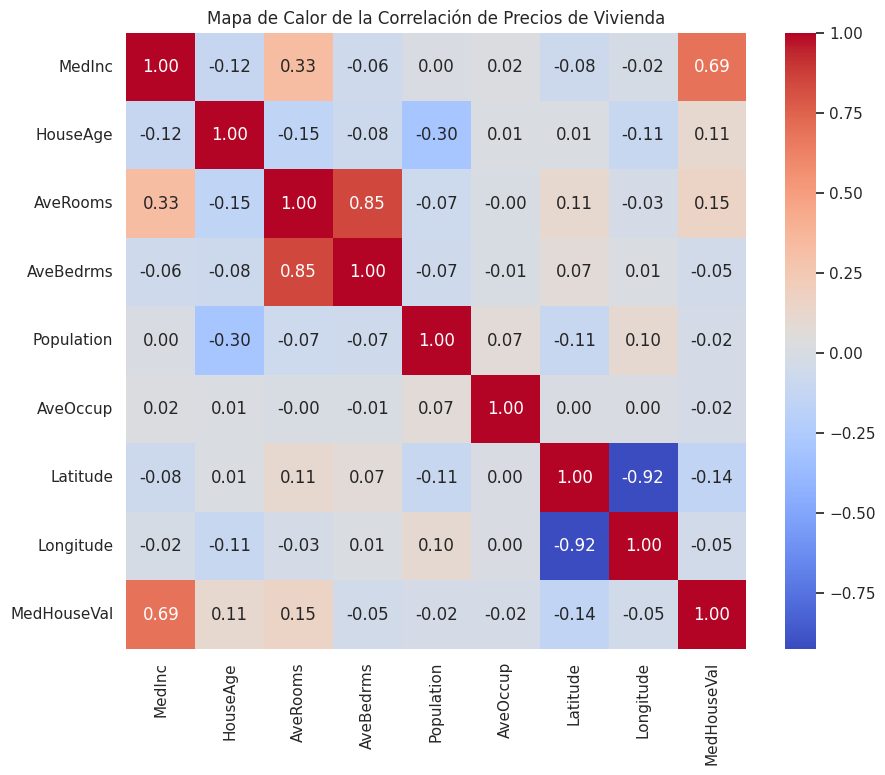

In [3]:
# Cargar el conjunto de datos de precios de viviendas en California
california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Calcular la matriz de correlación
corr_matrix = df_california.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación de Precios de Vivienda')
plt.show()

/tmp/ipython-input-3008875706.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.to_datetime(pd.date_range('2024-01-01', periods=24, freq='M'))


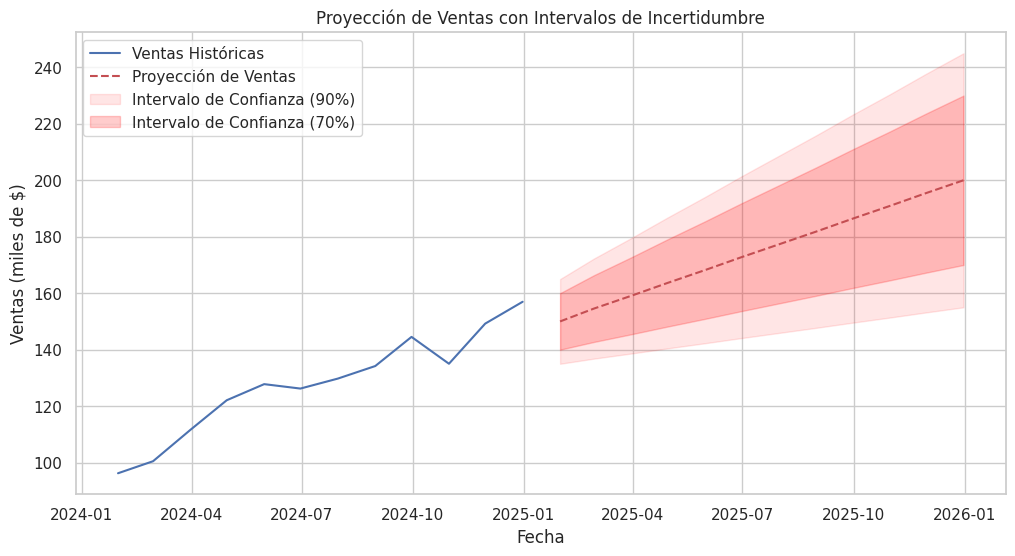

In [4]:
# Simulación de datos para el gráfico de abanico
fechas = pd.to_datetime(pd.date_range('2024-01-01', periods=24, freq='M'))
ventas_pasadas = np.linspace(100, 150, 12) + np.random.randn(12) * 5
ventas_predichas = np.linspace(150, 200, 12)
incertidumbre = np.linspace(10, 30, 12)

# Crear el gráfico de abanico
plt.figure(figsize=(12, 6))
plt.plot(fechas[:12], ventas_pasadas, 'b-', label='Ventas Históricas')
plt.plot(fechas[12:], ventas_predichas, 'r--', label='Proyección de Ventas')

# Crear los abanicos de incertidumbre
plt.fill_between(fechas[12:], ventas_predichas - incertidumbre * 1.5, ventas_predichas + incertidumbre * 1.5,
                 color='red', alpha=0.1, label='Intervalo de Confianza (90%)')
plt.fill_between(fechas[12:], ventas_predichas - incertidumbre, ventas_predichas + incertidumbre,
                 color='red', alpha=0.2, label='Intervalo de Confianza (70%)')

plt.title('Proyección de Ventas con Intervalos de Incertidumbre')
plt.xlabel('Fecha')
plt.ylabel('Ventas (miles de $)')
plt.legend()
plt.show()

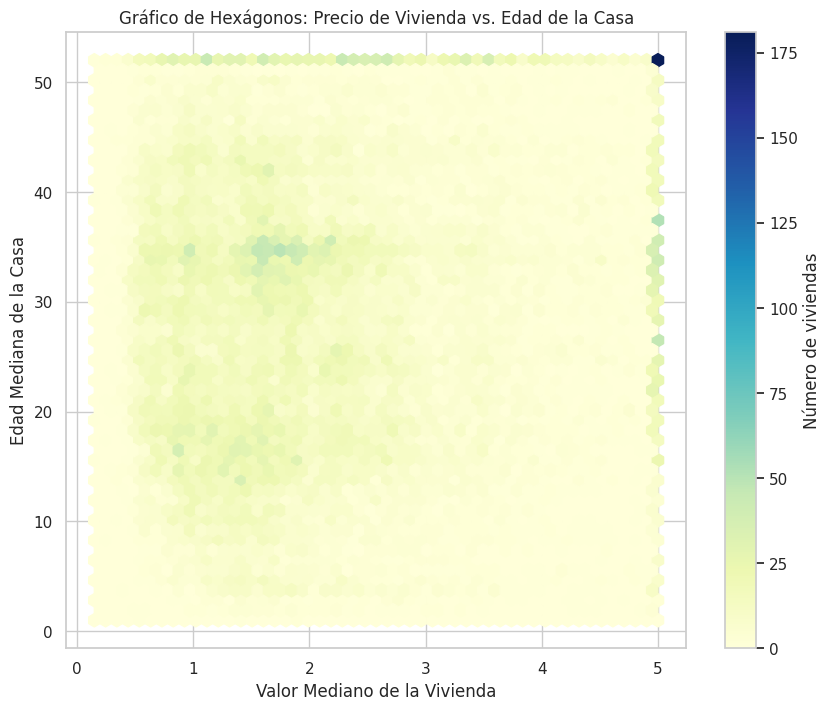

In [ ]:
# Cargar datos (si no lo has hecho ya)
# df_california = pd.DataFrame(california.data, columns=california.feature_names)
# df_california['MedHouseVal'] = california.target

plt.figure(figsize=(10, 8))
plt.hexbin(df_california['MedHouseVal'], df_california['HouseAge'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Número de viviendas')
plt.title('Gráfico de Hexágonos: Precio de Vivienda vs. Edad de la Casa')
plt.xlabel('Valor Mediano de la Vivienda')
plt.ylabel('Edad Mediana de la Casa')
plt.show()

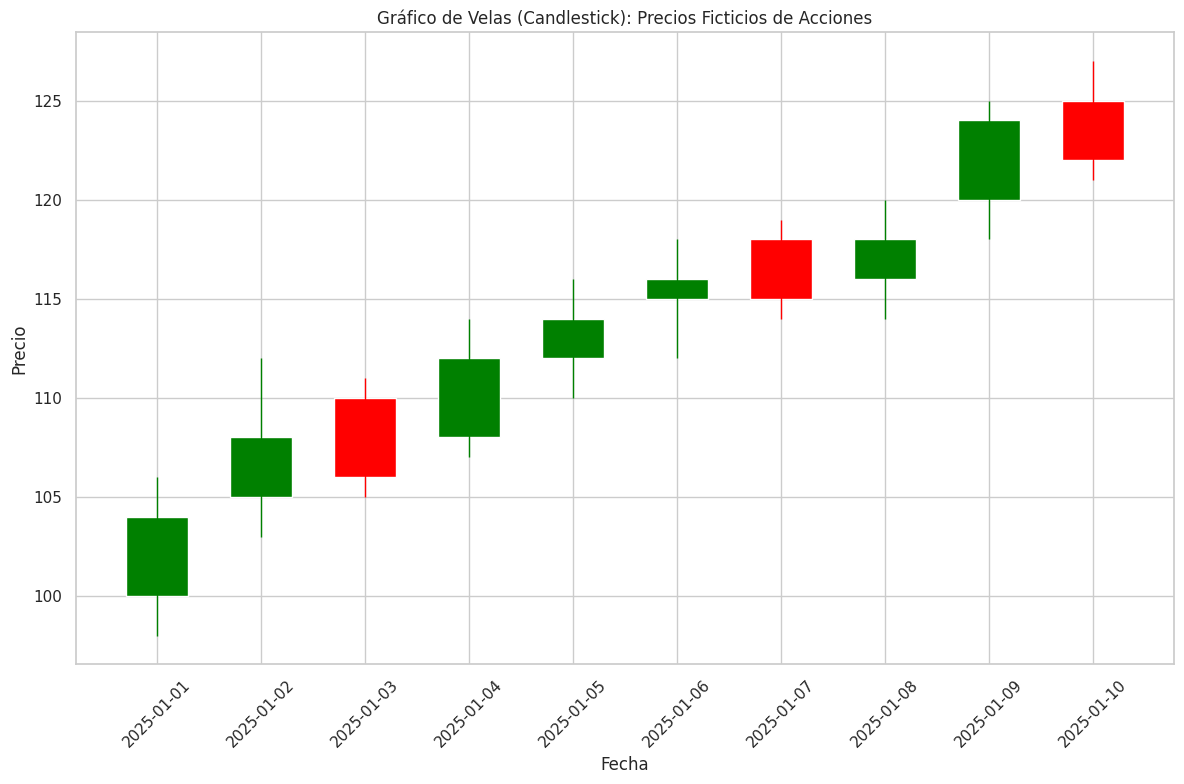

In [ ]:
# Simulación de datos de precios de acciones
data = {
    'Fecha': pd.to_datetime(pd.date_range('2025-01-01', periods=10)),
    'Apertura': [100, 105, 110, 108, 112, 115, 118, 116, 120, 125],
    'Cierre': [104, 108, 106, 112, 114, 116, 115, 118, 124, 122],
    'Maximo': [106, 112, 111, 114, 116, 118, 119, 120, 125, 127],
    'Minimo': [98, 103, 105, 107, 110, 112, 114, 114, 118, 121]
}
df_velas = pd.DataFrame(data)

# Crear el gráfico de velas
plt.figure(figsize=(12, 8))
for i in range(len(df_velas)):
    apertura = df_velas['Apertura'][i]
    cierre = df_velas['Cierre'][i]
    maximo = df_velas['Maximo'][i]
    minimo = df_velas['Minimo'][i]

    color = 'green' if cierre > apertura else 'red'

    plt.bar(df_velas['Fecha'][i], cierre - apertura, bottom=apertura, color=color, width=0.6)
    plt.vlines(df_velas['Fecha'][i], minimo, maximo, color=color, linewidth=1)

plt.title('Gráfico de Velas (Candlestick): Precios Ficticios de Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

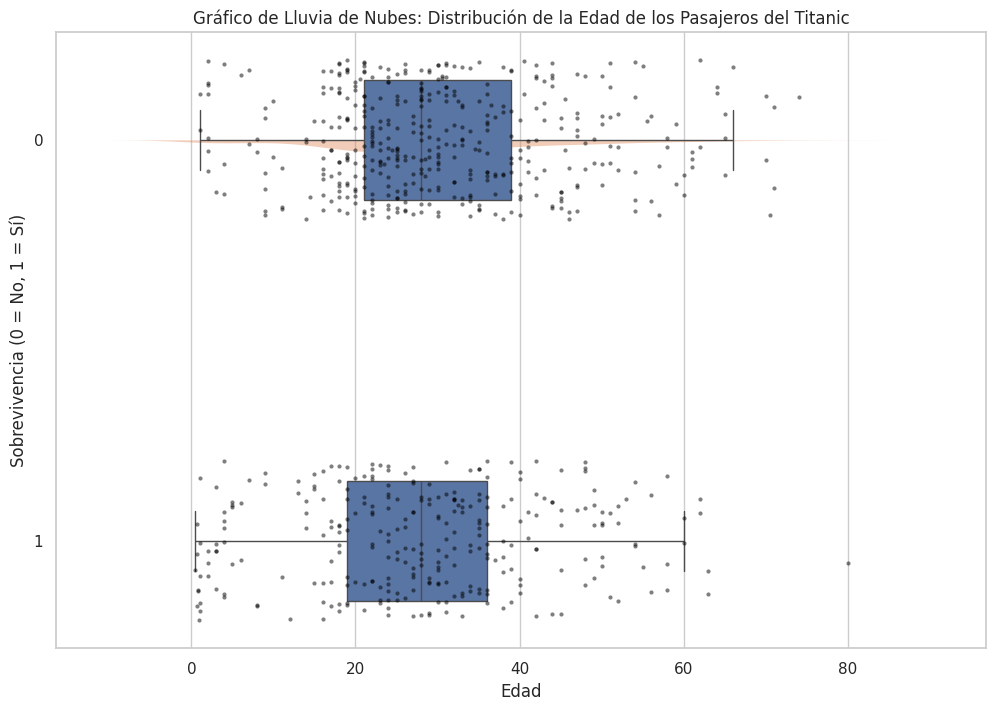

In [ ]:
# Cargar datos del Titanic si no lo has hecho
# df_titanic = sns.load_dataset('titanic')

# Filtrar datos sin valores nulos en la edad para el gráfico
df_titanic_age = df_titanic.dropna(subset=['age', 'survived'])

plt.figure(figsize=(12, 8))

# Gráfico de caja
sns.boxplot(x='age', y='survived', data=df_titanic_age, orient='h', width=0.3, fliersize=0)

# Puntos de datos individuales
sns.stripplot(x='age', y='survived', data=df_titanic_age, orient='h', jitter=0.2, alpha=0.5, size=3, color='black')

# Gráfico de densidad (la 'nube')
sns.kdeplot(x=df_titanic_age['age'], fill=True, alpha=0.4, linewidth=0)

plt.title('Gráfico de Lluvia de Nubes: Distribución de la Edad de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Sobrevivencia (0 = No, 1 = Sí)')
plt.show()

In [ ]:
!pip install squarify

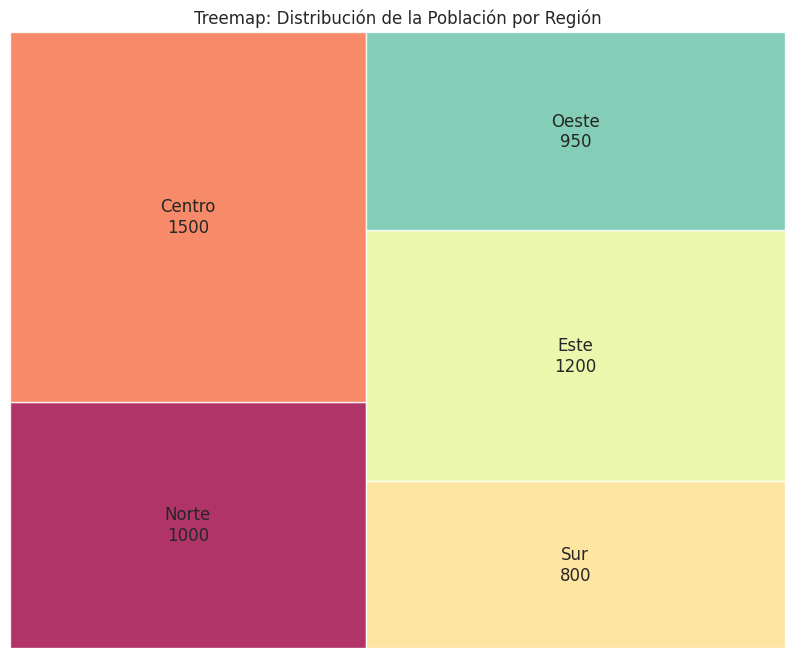

In [ ]:
import squarify

# Simulación de datos de población por región
data_poblacion = {
    'Norte': 1000,
    'Centro': 1500,
    'Sur': 800,
    'Este': 1200,
    'Oeste': 950
}

# Preparamos los datos para squarify
sizes = list(data_poblacion.values())
labels = [f'{region}\n{poblacion}' for region, poblacion in data_poblacion.items()]
colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]

# Crear el treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Treemap: Distribución de la Población por Región')
plt.axis('off') # Ocultar los ejes
plt.show()

In [ ]:
#!pip install skillmetrics
# 1. Instalar librería necesaria
!pip install skillmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 11.5 MB/s eta 0:00:00


ANÁLISIS DE MODELOS METEOROLÓGICOS CON DIAGRAMA DE TAYLOR

1. Generando datos meteorológicos sintéticos...
2. Creando diagrama de Taylor...
3. Evaluando modelos...
   Modelo Simple   - R: 0.951, RMSE: 3.08, Sesgo: -2.06
   Modelo con Sesgo - R: 0.905, RMSE: 4.71, Sesgo: 3.36
   Modelo Ruidoso  - R: 0.554, RMSE: 11.56, Sesgo: -9.61
   Modelo Avanzado - R: 0.998, RMSE: 0.50, Sesgo: 0.02


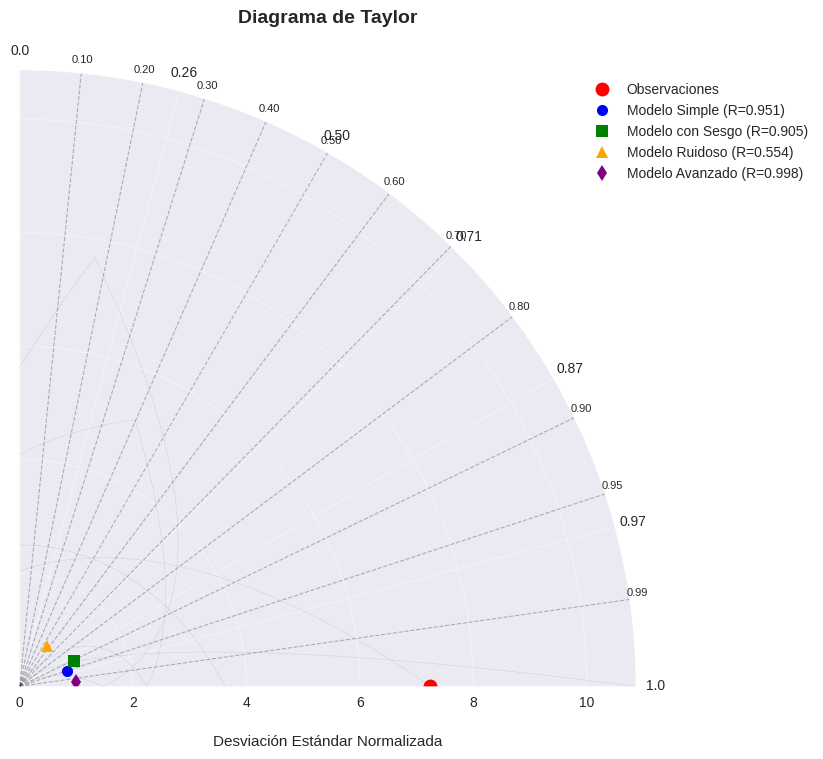

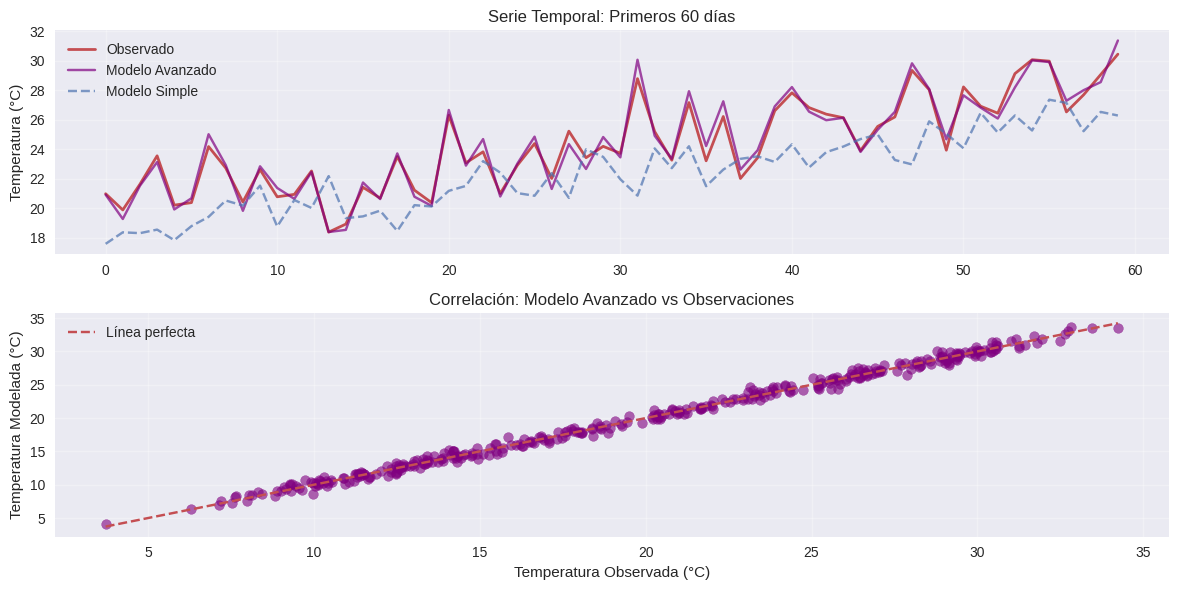


RESUMEN DE MÉTRICAS ESTADÍSTICAS
Modelo          Correlación  RMSE     Sesgo    Std Ratio 
------------------------------------------------------------
Modelo Simple   0.951        3.08     -2.06    0.885     
Modelo con Sesgo 0.905        4.71     3.36     1.063     
Modelo Ruidoso  0.554        11.56    -9.61    0.858     
Modelo Avanzado 0.998        0.50     0.02     0.999     

📊 INTERPRETACIÓN DEL DIAGRAMA DE TAYLOR:
- Puntos cercanos a la referencia (punto rojo) = mejor modelo
- Correlación alta (cerca del eje Y) = mejor reproducción de patrones
- Desviación estándar ~1 = variabilidad similar a observaciones
- El modelo avanzado (púrpura) es claramente el mejor

✅ Análisis completado. Los diagramas muestran:
   1. Diagrama de Taylor con evaluación de 4 modelos
   2. Series temporales para visualizar comportamiento
   3. Scatter plot de correlación del mejor modelo

💡 EJERCICIO PARA ESTUDIANTES:
   - Modifica los parámetros de ruido en los modelos
   - Experimenta con diferentes

In [5]:
"""
PRÁCTICA: DIAGRAMA DE TAYLOR PARA EVALUACIÓN DE MODELOS
========================================================
Práctica extra (no viene en el libro)

Un diagrama de Taylor es una herramienta estadística que permite evaluar
qué tan bien un modelo reproduce las observaciones mediante la visualización
simultánea de tres métricas estadísticas:
- Correlación de Pearson (R)
- Desviación estándar normalizada
- Error cuadrático medio (RMSE) normalizado

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy import stats

class TaylorDiagram:
    """
    Clase para crear diagramas de Taylor optimizados.

    Un diagrama de Taylor muestra la relación entre correlación,
    desviación estándar y RMSE en coordenadas polares.
    """

    def __init__(self, std_ref, fig=None, label_ref="Referencia"):
        """
        Inicializa el diagrama de Taylor.

        Args:
            std_ref (float): Desviación estándar de los datos de referencia
            fig: Figura de matplotlib (opcional)
            label_ref (str): Etiqueta para los datos de referencia
        """
        self.std_ref = std_ref
        self.fig = fig if fig else plt.figure(figsize=(10, 8))

        # Crear subplot con proyección polar
        self.ax = self.fig.add_subplot(111, projection='polar')
        self.setup_diagram(label_ref)

    def setup_diagram(self, label_ref):
        """Configura el diagrama base con círculos y líneas de correlación."""

        # Configurar límites y etiquetas
        self.ax.set_xlim(0, np.pi/2)  # Solo primer cuadrante
        self.ax.set_ylim(0, 1.5 * self.std_ref)

        # Líneas de correlación constante
        correlations = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
        for corr in correlations:
            theta = np.arccos(corr)
            self.ax.plot([theta, theta], [0, 1.5 * self.std_ref],
                        'k--', alpha=0.3, linewidth=0.8)
            # Etiquetas de correlación
            self.ax.text(theta, 1.52 * self.std_ref, f'{corr:.2f}',
                        ha='center', va='bottom', fontsize=8)

        # Círculos de desviación estándar constante
        for std_mult in [0.5, 1.0, 1.5]:
            circle = Circle((0, 0), std_mult * self.std_ref,
                          fill=False, linestyle='-', alpha=0.3, color='gray')
            self.ax.add_patch(circle)

        # Punto de referencia (observaciones)
        self.ax.plot(0, self.std_ref, 'ko', markersize=10,
                    markerfacecolor='red', markeredgecolor='black',
                    label=label_ref, zorder=10)

        # Configurar etiquetas
        self.ax.set_title('Diagrama de Taylor\n', pad=20, fontsize=14, fontweight='bold')
        self.ax.set_xlabel('Desviación Estándar Normalizada', labelpad=30)
        self.ax.grid(True, alpha=0.3)

        # Etiquetas de correlación en el arco
        self.ax.set_thetagrids([0, 15, 30, 45, 60, 75, 90],
                              labels=['1.0', '0.97', '0.87', '0.71', '0.50', '0.26', '0.0'])
        self.ax.set_rlabel_position(22.5)

    def add_model(self, data_model, data_obs, label, color='blue', marker='o'):
        """
        Añade un modelo al diagrama.

        Args:
            data_model (array): Datos del modelo
            data_obs (array): Datos observados (referencia)
            label (str): Etiqueta del modelo
            color (str): Color del punto
            marker (str): Tipo de marcador
        """
        # Calcular métricas estadísticas
        correlation = stats.pearsonr(data_obs, data_model)[0]
        std_model = np.std(data_model)
        std_normalized = std_model / self.std_ref

        # Convertir correlación a ángulo (coordenada theta)
        theta = np.arccos(correlation)

        # Plotear el punto
        self.ax.plot(theta, std_normalized, marker,
                    color=color, markersize=8,
                    markerfacecolor=color, markeredgecolor='black',
                    label=f'{label} (R={correlation:.3f})', zorder=5)

        return correlation, std_normalized

def generate_synthetic_weather_data(days=365, seed=42):
    """
    Genera datos meteorológicos sintéticos pero realistas.

    Simula temperatura, humedad y presión atmosférica con
    patrones estacionales y variabilidad realista.

    Args:
        days (int): Número de días a simular
        seed (int): Semilla para reproducibilidad

    Returns:
        dict: Diccionario con datos observados y modelos
    """
    np.random.seed(seed)

    # Crear serie temporal
    time = np.arange(days)

    # DATOS OBSERVADOS (referencia)
    # Temperatura con patrón estacional
    temp_base = 20 + 10 * np.sin(2 * np.pi * time / 365)  # Ciclo anual
    temp_obs = temp_base + np.random.normal(0, 2, days)   # Ruido realista

    # MODELO 1: Modelo simple (buena correlación, baja variabilidad)
    temp_model1 = temp_base * 0.9 + np.random.normal(0, 1, days)

    # MODELO 2: Modelo con sesgo (correlación media, alta variabilidad)
    temp_model2 = temp_base + 3 + np.random.normal(0, 3, days)

    # MODELO 3: Modelo ruidoso (baja correlación, alta variabilidad)
    temp_model3 = temp_base * 0.5 + np.random.normal(0, 5, days)

    # MODELO 4: Modelo casi perfecto (muy buena correlación)
    temp_model4 = temp_obs + np.random.normal(0, 0.5, days)

    return {
        'observado': temp_obs,
        'modelo_simple': temp_model1,
        'modelo_con_sesgo': temp_model2,
        'modelo_ruidoso': temp_model3,
        'modelo_avanzado': temp_model4,
        'tiempo': time
    }

def calculate_taylor_metrics(obs, model):
    """
    Calcula métricas para el diagrama de Taylor.

    Args:
        obs (array): Datos observados
        model (array): Datos del modelo

    Returns:
        dict: Métricas calculadas
    """
    correlation = stats.pearsonr(obs, model)[0]
    rmse = np.sqrt(mean_squared_error(obs, model))
    std_obs = np.std(obs)
    std_model = np.std(model)

    # RMSE normalizado
    rmse_normalized = rmse / std_obs

    return {
        'correlation': correlation,
        'rmse': rmse,
        'rmse_normalized': rmse_normalized,
        'std_obs': std_obs,
        'std_model': std_model,
        'bias': np.mean(model - obs)
    }

def create_taylor_analysis():
    """Función principal que ejecuta el análisis completo."""

    print("="*60)
    print("ANÁLISIS DE MODELOS METEOROLÓGICOS CON DIAGRAMA DE TAYLOR")
    print("="*60)

    # Generar datos sintéticos
    print("\n1. Generando datos meteorológicos sintéticos...")
    data = generate_synthetic_weather_data(days=365)

    # Crear diagrama de Taylor
    print("2. Creando diagrama de Taylor...")
    std_ref = np.std(data['observado'])
    taylor = TaylorDiagram(std_ref, label_ref="Observaciones")

    # Definir modelos y sus características visuales
    models = {
        'modelo_simple': {'color': 'blue', 'marker': 'o', 'name': 'Modelo Simple'},
        'modelo_con_sesgo': {'color': 'green', 'marker': 's', 'name': 'Modelo con Sesgo'},
        'modelo_ruidoso': {'color': 'orange', 'marker': '^', 'name': 'Modelo Ruidoso'},
        'modelo_avanzado': {'color': 'purple', 'marker': 'd', 'name': 'Modelo Avanzado'}
    }

    # Añadir modelos al diagrama y calcular métricas
    print("3. Evaluando modelos...")
    results = {}

    for model_key, style in models.items():
        # Calcular métricas completas
        metrics = calculate_taylor_metrics(data['observado'], data[model_key])
        results[style['name']] = metrics

        # Añadir al diagrama de Taylor
        taylor.add_model(
            data[model_key],
            data['observado'],
            style['name'],
            color=style['color'],
            marker=style['marker']
        )

        print(f"   {style['name']:15} - R: {metrics['correlation']:.3f}, "
              f"RMSE: {metrics['rmse']:.2f}, Sesgo: {metrics['bias']:.2f}")

    # Finalizar diagrama
    taylor.ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

    # Crear gráfico temporal complementario
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data['tiempo'][:60], data['observado'][:60], 'r-', linewidth=2, label='Observado')
    plt.plot(data['tiempo'][:60], data['modelo_avanzado'][:60], 'purple', alpha=0.7, label='Modelo Avanzado')
    plt.plot(data['tiempo'][:60], data['modelo_simple'][:60], 'b--', alpha=0.7, label='Modelo Simple')
    plt.ylabel('Temperatura (°C)')
    plt.title('Serie Temporal: Primeros 60 días')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    # Scatter plot: mejor modelo vs observaciones
    plt.scatter(data['observado'], data['modelo_avanzado'], alpha=0.6, color='purple')
    plt.plot([min(data['observado']), max(data['observado'])],
             [min(data['observado']), max(data['observado'])], 'r--', label='Línea perfecta')
    plt.xlabel('Temperatura Observada (°C)')
    plt.ylabel('Temperatura Modelada (°C)')
    plt.title('Correlación: Modelo Avanzado vs Observaciones')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Imprimir resumen de resultados
    print("\n" + "="*60)
    print("RESUMEN DE MÉTRICAS ESTADÍSTICAS")
    print("="*60)
    print(f"{'Modelo':<15} {'Correlación':<12} {'RMSE':<8} {'Sesgo':<8} {'Std Ratio':<10}")
    print("-" * 60)

    for name, metrics in results.items():
        std_ratio = metrics['std_model'] / metrics['std_obs']
        print(f"{name:<15} {metrics['correlation']:<12.3f} {metrics['rmse']:<8.2f} "
              f"{metrics['bias']:<8.2f} {std_ratio:<10.3f}")

    print("\n📊 INTERPRETACIÓN DEL DIAGRAMA DE TAYLOR:")
    print("- Puntos cercanos a la referencia (punto rojo) = mejor modelo")
    print("- Correlación alta (cerca del eje Y) = mejor reproducción de patrones")
    print("- Desviación estándar ~1 = variabilidad similar a observaciones")
    print("- El modelo avanzado (púrpura) es claramente el mejor")

# EJECUTAR ANÁLISIS COMPLETO
if __name__ == "__main__":
    # Configurar estilo de matplotlib para mejor visualización
    plt.style.use('seaborn-v0_8')
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 10

    # Ejecutar análisis
    create_taylor_analysis()

    print("\n✅ Análisis completado. Los diagramas muestran:")
    print("   1. Diagrama de Taylor con evaluación de 4 modelos")
    print("   2. Series temporales para visualizar comportamiento")
    print("   3. Scatter plot de correlación del mejor modelo")
    print("\n💡 EJERCICIO PARA ESTUDIANTES:")
    print("   - Modifica los parámetros de ruido en los modelos")
    print("   - Experimenta con diferentes tipos de sesgo")
    print("   - Añade tu propio modelo y evalúalo")